In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
import pprint 
import seaborn as sns
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
# import sentiment and graph data
sentiment_df_dtypes = {'id':'str', 'author':'str', 'score':'float', 'upvote_ratio':'float', 'num_comments':'int',
       'subreddit':'str', 'selftext':'str', 'comments':'object', 'post_sentiment_dict':'object',
       'post_pos_sentiment':'float', 'post_neg_sentiment':'float', 'post_compound_sentiment':'float'}
# change path as per your drive 
cornell_sentiment_df = pd.read_csv('processed_data/cornell/cornell_sentiment_new.csv', dtype=sentiment_df_dtypes, usecols=sentiment_df_dtypes.keys())


In [ ]:
cornell_sentiment_df

,id,author,score,upvote_ratio,num_comments,subreddit,selftext,comments,post_sentiment_dict,post_pos_sentiment,post_neg_sentiment,post_compound_sentiment
0,udjiue,zo_wee_mama,290.0,0.95,51,Cornell,"I don’t go to Cornell, I got to NYU but I some...","[{'author': 'ConsistentScar9841', 'body': 'abs...","{'neg': 0.071, 'neu': 0.846, 'pos': 0.083, 'co...",0.083,0.071,0.1306
1,lrg3fl,zikachu11,340.0,0.99,35,Cornell,"In my FWS I was trying to be friendly, I remem...","[{'author': 'BRF-or-bust', 'body': 'COE checks...","{'neg': 0.077, 'neu': 0.834, 'pos': 0.089, 'co...",0.089,0.077,0.2748
2,nf2k9z,zikachu11,263.0,0.90,12,Cornell,"If you’re interested in girls, there’s really ...","[{'author': 'Itchy_Fudge_2134', 'body': 'Funny...","{'neg': 0.06, 'neu': 0.579, 'pos': 0.361, 'com...",0.361,0.060,0.9094
3,hdvn9a,you112233,918.0,0.99,68,Cornell,I summarized their summary with most of the bi...,"[{'author': 'pcsm12', 'body': 'Someone give th...","{'neg': 0.063, 'neu': 0.844, 'pos': 0.093, 'co...",0.093,0.063,0.9672
4,kr3old,yikayika,288.0,0.97,61,Cornell,I'm super successful in the eyes of a lot of p...,"[{'author': 'cornellmanletboy', 'body': ""I cer...","{'neg': 0.088, 'neu': 0.758, 'pos': 0.153, 'co...",0.153,0.088,0.9728
...,...,...,...,...,...,...,...,...,...,...,...,...
302,qp29en,AgreeableAstronomer,254.0,0.97,43,Cornell,[The Greenest Pilgrim U'Know 🦃🥧🙏🏻 on Twitter: ...,"[{'author': 'None', 'body': '[deleted]', 'scor...","{'neg': 0.182, 'neu': 0.798, 'pos': 0.02, 'com...",0.020,0.182,-0.9629
303,q0p56z,AGuineaHen,255.0,0.99,31,Cornell,Is it really stealing if he was on the Unlimit...,"[{'author': 'AGuineaHen', 'body': 'UPDATE: Ask...","{'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp...",0.000,0.185,-0.6739
304,a2ftbu,9986000min,358.0,0.99,18,Cornell,I was coming out of teagle and I spotted this ...,"[{'author': 'cornellanon1998', 'body': 'This m...","{'neg': 0.016, 'neu': 0.893, 'pos': 0.091, 'co...",0.091,0.016,0.7407
305,k8ocrl,9986000min,268.0,0.98,18,Cornell,fuck,"[{'author': 'a123bcer', 'body': 'SHIT', 'score...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,1.000,-0.5423


In [ ]:
cornell_sentiment_df['comments'] = cornell_sentiment_df['comments'].apply(lambda x: eval(x))
# berkeley_sentiment_df['comment_sentiment_list'] = berkeley_sentiment_df['comment_sentiment_list'].apply(lambda x: eval(x))
cornell_sentiment_df['post_sentiment_dict'] = cornell_sentiment_df['post_sentiment_dict'].apply(lambda x: eval(x))

In [ ]:
cornell_sentiment_df.columns

Index(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext', 'comments', 'post_sentiment_dict', 'post_pos_sentiment',
       'post_neg_sentiment', 'post_compound_sentiment'],
      dtype='object')

In [ ]:
# import centrality data
centrality_df_dtype = {'author':'str', 'btw_centrality':'float', 'deg_centrality':'float',
       'eig_centrality':'float', 'pagerank':'float', 'clustering_coeff':'float'}
cornell_centrality_df = pd.read_csv('processed_data/cornell/cornell_centrality_poster.csv', dtype=centrality_df_dtype, usecols=centrality_df_dtype.keys())

In [ ]:
cornell_regression_df = cornell_sentiment_df[['author', 'post_pos_sentiment', 'post_neg_sentiment', 'num_comments',
       'post_compound_sentiment', 'upvote_ratio']].merge(cornell_centrality_df, on='author', how='left')

In [ ]:
cornell_regression_df

,author,post_pos_sentiment,post_neg_sentiment,num_comments,post_compound_sentiment,upvote_ratio,btw_centrality,deg_centrality,eig_centrality,pagerank,clustering_coeff
0,zo_wee_mama,0.083,0.071,51,0.1306,0.95,0.006753,0.005729,0.003807,0.000636,0.027778
1,zikachu11,0.089,0.077,35,0.2748,0.99,0.008994,0.010821,0.046401,0.000636,0.036765
2,zikachu11,0.361,0.060,12,0.9094,0.90,0.008994,0.010821,0.046401,0.000636,0.036765
3,you112233,0.093,0.063,68,0.9672,0.99,0.002971,0.007002,0.015379,0.000636,0.054545
4,yikayika,0.153,0.088,61,0.9728,0.97,0.007051,0.006365,0.006593,0.000636,0.022222
...,...,...,...,...,...,...,...,...,...,...,...
302,AgreeableAstronomer,0.020,0.182,43,-0.9629,0.97,0.005573,0.007002,0.041005,0.000636,0.054545
303,AGuineaHen,0.000,0.185,31,-0.6739,0.99,0.008455,0.006365,0.034583,0.000636,0.022222
304,9986000min,0.091,0.016,18,0.7407,0.99,0.012065,0.012731,0.049373,0.000636,0.036842
305,9986000min,0.000,1.000,18,-0.5423,0.98,0.012065,0.012731,0.049373,0.000636,0.036842


In [ ]:
cornell_regression_avg_df = cornell_regression_df.groupby('eig_centrality').mean()

<ipython-input-30-78772e619da0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cornell_regression_avg_df = cornell_regression_df.groupby('eig_centrality').mean()


In [ ]:
cornell_regression_avg_df = cornell_regression_avg_df.reset_index()

In [ ]:
# fit a univariate regression model
def fit_regression_line(y, X, regressor):
  model = sm.OLS(y, X)
  results = model.fit()

  param = results.params
  fitted = np.transpose(X) * param

  fig, ax = plt.subplots(figsize=(8,4))
  plt.plot(X, y, 'o')
  plt.plot(X, fitted ,'-', label='coefficient: ' + str(round(param[0], 2)))
  ax.set_xlabel(regressor)
  ax.set_ylabel('post_pos_sentiment')
  plt.legend()
  plt.show()

In [ ]:
def fit_regression_line_intercept(y, X, regressor):
    X = sm.add_constant(X)  # adding a constant term for intercept
    model = sm.OLS(y, X)
    results = model.fit()

    param = results.params
    fitted = np.dot(X, param)

    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(X[:, 1], y, 'o')  # X[:, 1] since X[:, 0] is the constant term
    plt.plot(X[:, 1], fitted ,'-', label='intercept: ' + str(round(param[0], 2)) +
                                        ', coefficient: ' + str(round(param[1], 2)))
    ax.set_xlabel(regressor)
    ax.set_ylabel('post_pos_sentiment')
    plt.legend()
    plt.show()



---



### eig_centrality vs post_pos_sentiment 
Model : 
<!-- $y_{agg-pos-comment-sentiment} = \beta_0 + \beta_1 \cdot X_{eig-centrality} + \beta_2 \cdot X_{post-pos-sentiment} + \beta_3 \cdot X_{num-comments} + \epsilon $
Here, we control for the post positive sentiment to make sure that the comment sentiment is not being driven by the fact that the user posted something positive which is leading other users to comment a certain way. We also control for the number of comments, since the change aggregated comment sentiment may be driven by the number of comments the post has.  -->

In [ ]:
cornell_regression_avg_df.columns

Index(['author', 'post_pos_sentiment', 'post_neg_sentiment', 'num_comments',
       'post_compound_sentiment', 'upvote_ratio', 'btw_centrality',
       'deg_centrality', 'eig_centrality', 'pagerank', 'clustering_coeff'],
      dtype='object')

In [ ]:
# for all values of eig_centrality
X = cornell_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2736
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.844
Time:                        17:41:36   Log-Likelihood:                 214.34
No. Observations:                 240   AIC:                            -420.7
Df Residuals:                     236   BIC:                            -406.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0702      0.180      0.391      0.6

In [ ]:
# for all values of eig_centrality
X = cornell_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df['post_compound_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     4.212
Date:                Sun, 04 Jun 2023   Prob (F-statistic):            0.00631
Time:                        17:43:24   Log-Likelihood:                -244.51
No. Observations:                 240   AIC:                             497.0
Df Residuals:                     236   BIC:                             510.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5808      1.216     -2.946      0.0

In [ ]:
# for all values of eig_centrality
cornell_regression_avg_df['ln_eig_centrality'] = np.log(cornell_regression_avg_df['eig_centrality'])
X = cornell_regression_avg_df[['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1320
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.941
Time:                        17:58:38   Log-Likelihood:                 214.12
No. Observations:                 240   AIC:                            -420.2
Df Residuals:                     236   BIC:                            -406.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0838      0.183      0.457      0.6

In [ ]:
# for all values of eig_centrality
cornell_regression_avg_df['ln_eig_centrality'] = np.log(cornell_regression_avg_df['eig_centrality'])
X = cornell_regression_avg_df[['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df['post_compound_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     5.253
Date:                Sun, 04 Jun 2023   Prob (F-statistic):            0.00159
Time:                        17:58:44   Log-Likelihood:                -243.02
No. Observations:                 240   AIC:                             494.0
Df Residuals:                     236   BIC:                             508.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0009      1.231     -3.249      0.0

In [ ]:
# removing outliers, i.e., very few users which have very high eigenvector centrality
X = cornell_regression_avg_df[cornell_regression_avg_df['eig_centrality'] < 0.15][['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df[cornell_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4796
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.697
Time:                        17:44:10   Log-Likelihood:                 212.05
No. Observations:                 238   AIC:                            -416.1
Df Residuals:                     234   BIC:                            -402.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0743      0.180      0.413      0.6

In [ ]:
# removing outliers, i.e., very few users which have very high eigenvector centrality
X = cornell_regression_avg_df[cornell_regression_avg_df['eig_centrality'] < 0.15][['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df[cornell_regression_avg_df['eig_centrality'] < 0.15]['post_compound_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     4.669
Date:                Sun, 04 Jun 2023   Prob (F-statistic):            0.00345
Time:                        17:44:23   Log-Likelihood:                -242.71
No. Observations:                 238   AIC:                             493.4
Df Residuals:                     234   BIC:                             507.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6255      1.218     -2.977      0.0

In [ ]:
# removing outliers, i.e., very few users which have very high eigenvector centrality
X = cornell_regression_avg_df[cornell_regression_avg_df['eig_centrality'] < 0.15][['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df[cornell_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1238
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.946
Time:                        17:41:49   Log-Likelihood:                 211.51
No. Observations:                 238   AIC:                            -415.0
Df Residuals:                     234   BIC:                            -401.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0818      0.184      0.444      0.6

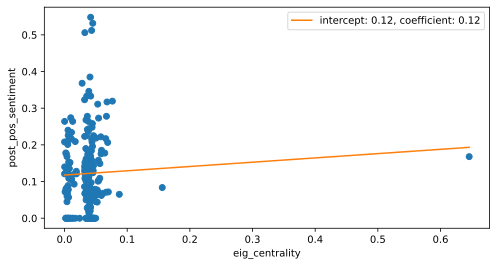

In [ ]:
fit_regression_line_intercept(cornell_regression_avg_df['post_pos_sentiment'].values, cornell_regression_avg_df['eig_centrality'].values, 'eig_centrality')

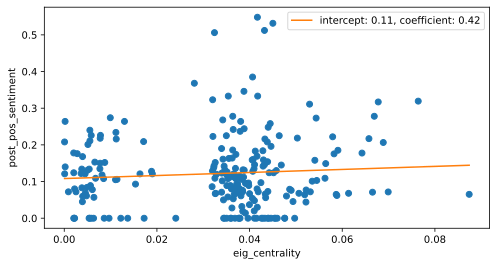

In [ ]:
fit_regression_line_intercept(cornell_regression_avg_df[cornell_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values, cornell_regression_avg_df[cornell_regression_avg_df['eig_centrality'] < 0.15]['eig_centrality'].values, 'eig_centrality')

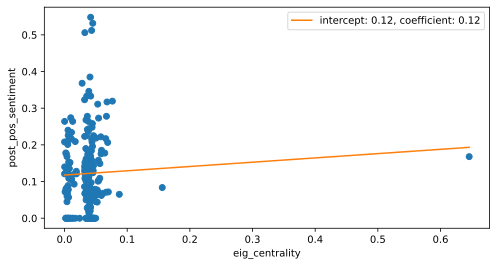

In [ ]:
fit_regression_line_intercept(cornell_regression_avg_df['post_pos_sentiment'].values, cornell_regression_avg_df['eig_centrality'].values, 'eig_centrality')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = cornell_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio', 'btw_centrality', 'deg_centrality', 'clustering_coeff']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [ ]:
vif

,VIF,variable
0,30.405055,eig_centrality
1,1.259977,num_comments
2,5.593760,upvote_ratio
3,24.254987,btw_centrality
4,52.031233,deg_centrality
5,4.174785,clustering_coeff


### deg_centrality vs post_pos_sentiment
<!-- Model : 
$y_{agg-pos-comment-sentiment} = \beta_0 + \beta_1 \cdot X_{deg-centrality} + \beta_2 \cdot X_{post-pos-sentiment} + \beta_3 \cdot X_{num-comments} + \epsilon $
Here, we control for the post positive sentiment to make sure that the comment sentiment is not being driven by the fact that the user posted something positive which is leading other users to comment a certain way.  -->

(array([29., 42., 38., 36., 37., 30., 20., 12.,  8.,  3.,  3.,  2.,  2.,
         1.,  2.,  1.,  0.,  4.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00083626, 0.00201037, 0.00318448, 0.00435859, 0.0055327 ,
        0.00670681, 0.00788092, 0.00905503, 0.01022914, 0.01140324,
        0.01257735, 0.01375146, 0.01492557, 0.01609968, 0.01727379,
        0.0184479 , 0.01962201, 0.02079612, 0.02197023, 0.02314434,
        0.02431845, 0.02549256, 0.02666667, 0.02784078, 0.02901489,
        0.03018899, 0.0313631 , 0.03253721, 0.03371132, 0.03488543,
        0.03605954, 0.0372

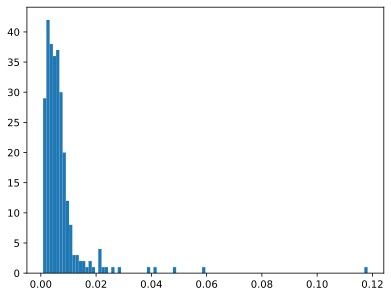

In [ ]:
plt.hist(berkeley_regression_avg_df['deg_centrality'].values, bins= 100)

In [ ]:
# for all values of eig_centrality
X = cornell_regression_avg_df[['deg_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2595
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.855
Time:                        17:37:50   Log-Likelihood:                 214.31
No. Observations:                 240   AIC:                            -420.6
Df Residuals:                     236   BIC:                            -406.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0690      0.180      0.384      0.7

In [ ]:
# for all values of eig_centrality
cornell_regression_avg_df['ln_deg_centrality'] = np.log(cornell_regression_avg_df['deg_centrality'])
X = cornell_regression_avg_df[['ln_deg_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3869
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.763
Time:                        17:37:59   Log-Likelihood:                 214.51
No. Observations:                 240   AIC:                            -421.0
Df Residuals:                     236   BIC:                            -407.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1529      0.199      0.767      0.4

We still get an $R^2 = 0.355$ , and we get a positive statistically significant $\beta_1$ which implies that well connected users get higher perceived social support from their peers. 

In [ ]:
# removing outliers, i.e., very few users which have very high degree centrality
X = cornell_regression_avg_df[cornell_regression_avg_df['deg_centrality'] < 0.02][['deg_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df[cornell_regression_avg_df['deg_centrality'] < 0.02]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4675
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.705
Time:                        17:38:09   Log-Likelihood:                 209.19
No. Observations:                 234   AIC:                            -410.4
Df Residuals:                     230   BIC:                            -396.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0653      0.180      0.363      0.7

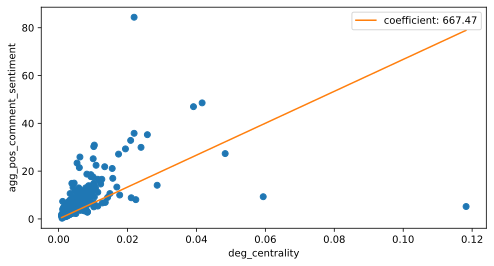

In [ ]:
# full data 
# fit_regression_line(berkeley_regression_avg_df['agg_pos_comment_sentiment'].values, berkeley_regression_avg_df['deg_centrality'].values, 'deg_centrality')

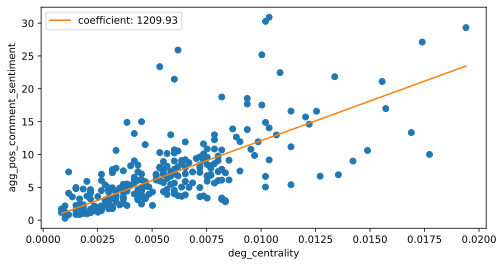

In [ ]:
# removing outliers 
# fit_regression_line(y, berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['deg_centrality'].values, 'deg_centrality')

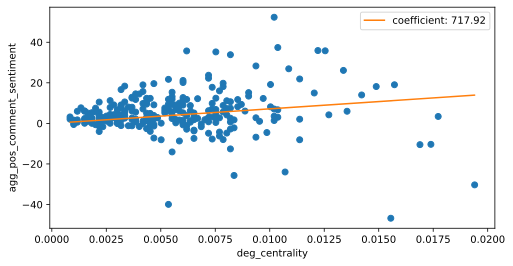

In [ ]:
# fit_regression_line(berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['agg_compound_comment_sentiment'].values, berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['deg_centrality'].values, 'deg_centrality')

### Computing VIF to check for multi-collinearity 

Clustering coefficient

In [ ]:
# for all values of eig_centrality
X = cornell_regression_avg_df[['clustering_coeff', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1232
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.946
Time:                        17:38:20   Log-Likelihood:                 214.11
No. Observations:                 240   AIC:                            -420.2
Df Residuals:                     236   BIC:                            -406.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0678      0.180      0.377      0.7